In [ ]:
import io
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving U.S._Chronic_Disease_Indicators.csv to U.S._Chronic_Disease_Indicators.csv


In [ ]:
df_source = pd.read_csv(io.StringIO(uploaded['U.S._Chronic_Disease_Indicators.csv'].decode('utf-8')))
df_source.head()

<ipython-input-4-1e5314332128>:1: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_source = pd.read_csv(io.StringIO(uploaded['U.S._Chronic_Disease_Indicators.csv'].decode('utf-8')))


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,...,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN


In [ ]:
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  403984 non-null  int64  
 1   YearEnd                    403984 non-null  int64  
 2   LocationAbbr               403984 non-null  object 
 3   LocationDesc               403984 non-null  object 
 4   DataSource                 403984 non-null  object 
 5   Topic                      403984 non-null  object 
 6   Question                   403984 non-null  object 
 7   Response                   79323 non-null   object 
 8   DataValueUnit              374119 non-null  object 
 9   DataValueType              403984 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    188019 non-null  object 
 13  DatavalueFootnote          18

In [ ]:
#Let's see which features are completely filled
(df_source.count()/len(df_source))*100

YearStart                    100.000000
YearEnd                      100.000000
LocationAbbr                 100.000000
LocationDesc                 100.000000
DataSource                   100.000000
Topic                        100.000000
Question                     100.000000
Response                      19.635184
DataValueUnit                 92.607380
DataValueType                100.000000
DataValue                     73.719999
DataValueAlt                  67.741792
DataValueFootnoteSymbol       46.541200
DatavalueFootnote             46.500109
LowConfidenceLimit            61.096232
HighConfidenceLimit           61.096232
StratificationCategory1      100.000000
Stratification1              100.000000
StratificationCategory2       19.635184
Stratification2               19.635184
StratificationCategory3       19.635184
Stratification3               19.635184
GeoLocation                   99.364331
ResponseID                    19.635184
LocationID                   100.000000


In [ ]:
def df_values(df):
    for i in range(0, len(df.columns)):
        print("*****start of feature ", df.columns[i], "*************************")
        print (df.iloc[:,i].value_counts())
        print ("*****end of feature ", df.columns[i], "************************** \n")

In [ ]:
def df_values_enhanced(df, max_unique_values=50, skip_numerical=False):
    import numpy as np

    for column in df.columns:
        if skip_numerical and np.issubdtype(df[column].dtype, np.number):
            continue

        unique_values = df[column].nunique()
        if unique_values > max_unique_values:
            print(f"***** Skipping feature {column} with {unique_values} unique values *****\n")
            continue

        print(f"***** Start of feature {column} *****")
        print(df[column].value_counts())
        print(f"***** End of feature {column} *****\n")

# Example call:
df_values_enhanced(df_source, max_unique_values=100, skip_numerical=True)


***** Start of feature LocationAbbr *****
LocationAbbr
NC    7779
KY    7779
SC    7779
NV    7779
NJ    7779
WI    7779
NE    7779
NY    7778
AZ    7747
FL    7747
IA    7746
VT    7732
HI    7688
OR    7680
NM    7680
MI    7680
SD    7680
WV    7680
WA    7680
AR    7648
CO    7647
UT    7575
MD    7575
RI    7575
MA    7574
CA    7542
MS    7533
PA    7386
OK    7386
OH    7386
WY    7386
KS    7386
LA    7386
VA    7386
MT    7386
MO    7386
TX    7386
ND    7386
MN    7385
IN    7385
ME    7384
TN    7384
NH    7383
AK    7354
AL    7354
IL    7354
ID    7354
GA    7354
CT    7353
DC    7352
DE    7351
PR    5635
GU    5597
VI    5551
US    2568
Name: count, dtype: int64
***** End of feature LocationAbbr *****

***** Start of feature LocationDesc *****
LocationDesc
North Carolina          7779
Kentucky                7779
South Carolina          7779
Nevada                  7779
New Jersey              7779
Wisconsin               7779
Nebraska                7779
New York       

In [ ]:
#Exploring the values of every feature
df_values(df_source)

*****start of feature  YearStart *************************
YearStart
2013    85913
2012    75796
2014    75524
2011    74593
2015    64046
2010    24965
2009     2771
2016      109
2008      108
2001      104
2007       55
Name: count, dtype: int64
*****end of feature  YearStart ************************** 

*****start of feature  YearEnd *************************
YearEnd
2013    88409
2012    76108
2014    75524
2011    74556
2015    64046
2010    24965
2016      109
2008      108
2001      104
2007       55
Name: count, dtype: int64
*****end of feature  YearEnd ************************** 

*****start of feature  LocationAbbr *************************
LocationAbbr
NC    7779
KY    7779
SC    7779
NV    7779
NJ    7779
WI    7779
NE    7779
NY    7778
AZ    7747
FL    7747
IA    7746
VT    7732
HI    7688
OR    7680
NM    7680
MI    7680
SD    7680
WV    7680
WA    7680
AR    7648
CO    7647
UT    7575
MD    7575
RI    7575
MA    7574
CA    7542
MS    7533
PA    7386
OK    7386
OH    73

In [ ]:
# Lets get of rid those features considered meaningless to my personal understanding: StratificationCategory2, Stratification2, StratificationCategory3,Stratification3,GeoLocation,ResponseID, LocationID
indexes=[18,19,20,21,22,23,24,30,31,32,33]
df_source=df_source.drop(df_source.columns[indexes],axis=1)

In [ ]:
#Re-do info() and non-null percentage distribution among features
print(df_source.info())
print((df_source.count()/len(df_source))*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  403984 non-null  int64  
 1   YearEnd                    403984 non-null  int64  
 2   LocationAbbr               403984 non-null  object 
 3   LocationDesc               403984 non-null  object 
 4   DataSource                 403984 non-null  object 
 5   Topic                      403984 non-null  object 
 6   Question                   403984 non-null  object 
 7   Response                   79323 non-null   object 
 8   DataValueUnit              374119 non-null  object 
 9   DataValueType              403984 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    188019 non-null  object 
 13  DatavalueFootnote          18

In [ ]:
#DataValue feature seems to be the key one to drop those rows that have null value
#Altough DataValueAlt could be complementary to DataValue, i.e. some rows with DataValue null value might
#have DataValueAlt filled
#So let's drop those rows where there are null value in DataValue && DataValueAlt features
df_source_filtered=df_source.dropna(how='all', subset=['DataValue','DataValueAlt'])
df_source_filtered.reset_index(drop=True, inplace=True)
df_source_filtered.shape

(297817, 23)

In [ ]:
df_source_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297817 entries, 0 to 297816
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  297817 non-null  int64  
 1   YearEnd                    297817 non-null  int64  
 2   LocationAbbr               297817 non-null  object 
 3   LocationDesc               297817 non-null  object 
 4   DataSource                 297817 non-null  object 
 5   Topic                      297817 non-null  object 
 6   Question                   297817 non-null  object 
 7   Response                   79284 non-null   object 
 8   DataValueUnit              268822 non-null  object 
 9   DataValueType              297817 non-null  object 
 10  DataValue                  297817 non-null  object 
 11  DataValueAlt               273666 non-null  float64
 12  DataValueFootnoteSymbol    81852 non-null   object 
 13  DatavalueFootnote          81

In [ ]:
# Explore values in "apparently key" features as topic
# The dataframe is divided into several 'Topic' that could be employed to be analyzed by separate
df_source_filtered['Topic'].value_counts()

Topic
Cardiovascular Disease                             52816
Diabetes                                           44109
Chronic Obstructive Pulmonary Disease              36815
Nutrition, Physical Activity, and Weight Status    26507
Overarching Conditions                             23453
Arthritis                                          22255
Asthma                                             21461
Alcohol                                            20129
Tobacco                                            16305
Chronic Kidney Disease                              9851
Cancer                                              6399
Oral Health                                         5777
Mental Health                                       4395
Immunization                                        3553
Older Adults                                        2829
Reproductive Health                                 1110
Disability                                            53
Name: count, dtype: int64

In [ ]:
#Let's try with Cardiovascular Disease due to its highest occurrence
df_cvd=df_source_filtered[df_source_filtered['Topic']=='Cardiovascular Disease']
df_cvd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52816 entries, 11034 to 293242
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  52816 non-null  int64  
 1   YearEnd                    52816 non-null  int64  
 2   LocationAbbr               52816 non-null  object 
 3   LocationDesc               52816 non-null  object 
 4   DataSource                 52816 non-null  object 
 5   Topic                      52816 non-null  object 
 6   Question                   52816 non-null  object 
 7   Response                   33339 non-null  object 
 8   DataValueUnit              42434 non-null  object 
 9   DataValueType              52816 non-null  object 
 10  DataValue                  52816 non-null  object 
 11  DataValueAlt               46495 non-null  float64
 12  DataValueFootnoteSymbol    33540 non-null  object 
 13  DatavalueFootnote          33465 non-null  obj

In [ ]:

# Quick summary of numeric data
print(df_cvd.describe())


          YearStart       YearEnd   DataValueAlt  LowConfidenceLimit  \
count  52816.000000  52816.000000   46495.000000        37332.000000   
mean    2012.305797   2012.305797    1180.141470           73.701975   
std        1.558904      1.558904   12883.185037           64.882946   
min     2010.000000   2010.000000       1.300000            0.800000   
25%     2011.000000   2011.000000      39.600000           30.400000   
50%     2012.000000   2012.000000      73.500000           54.200000   
75%     2013.000000   2013.000000     163.000000           82.900000   
max     2015.000000   2015.000000  807775.000000          390.500000   

       HighConfidenceLimit  
count         37332.000000  
mean             89.026672  
std              68.811653  
min               2.100000  
25%              43.100000  
50%              70.700000  
75%              98.000000  
max             593.700000  


In [ ]:
df_cvd['Question'].value_counts()

Question
Mortality from heart failure                                                                                                   6136
Mortality from total cardiovascular diseases                                                                                   6135
Mortality from cerebrovascular disease (stroke)                                                                                6135
Mortality from diseases of the heart                                                                                           6135
Mortality from coronary heart disease                                                                                          6135
Cholesterol screening among adults aged >= 18 years                                                                            2442
Awareness of high blood pressure among adults aged >= 18 years                                                                 2422
Influenza vaccination among noninstitutionalized adults aged 18-64 

In [ ]:
# extra sentences used to try instructions
question_counts=df_cvd['Question'].value_counts()

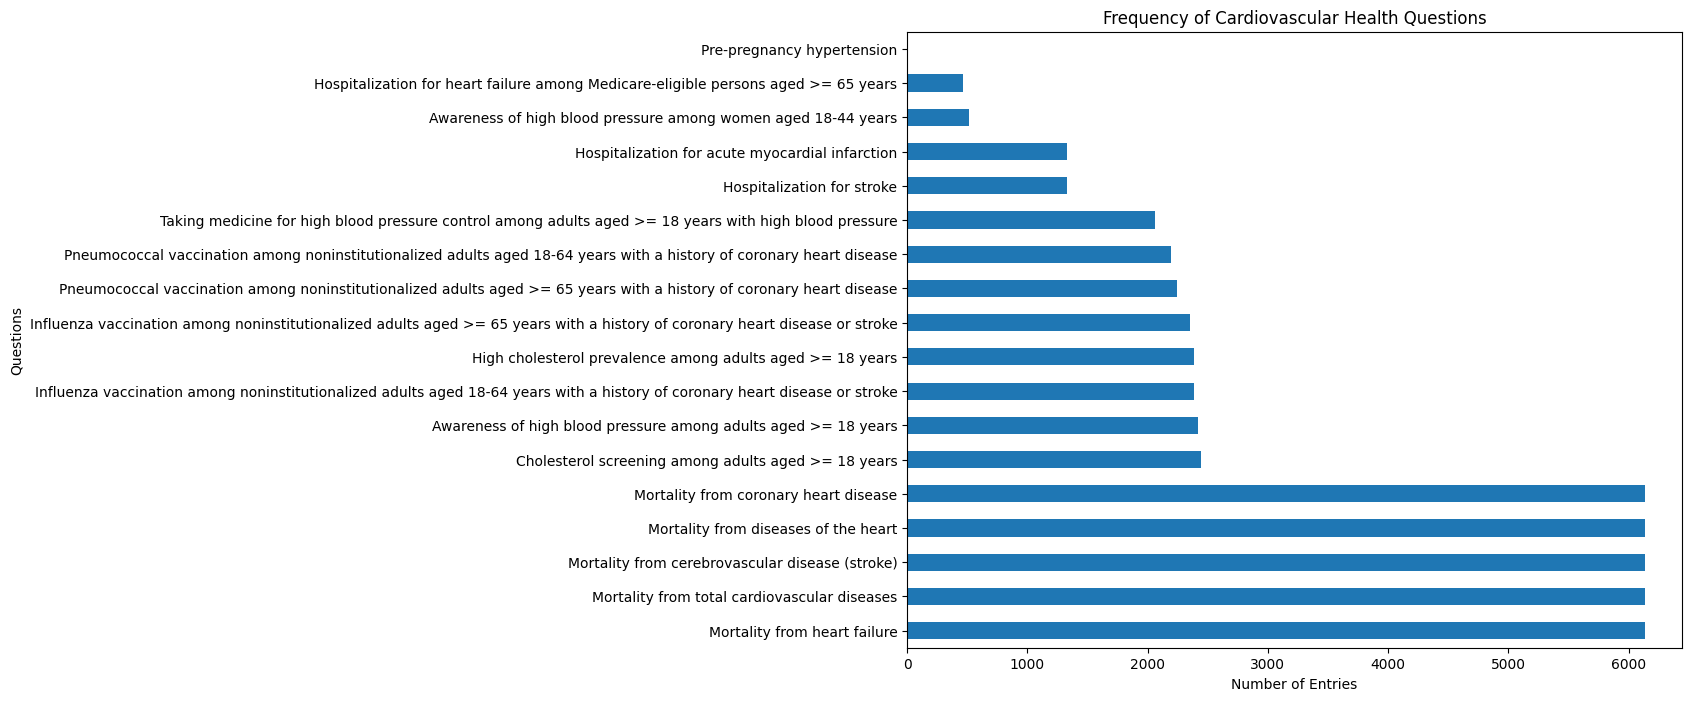

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'question_counts' is a pandas Series like the one you've displayed
question_counts.plot(kind='barh', figsize=(10, 8))
plt.title('Frequency of Cardiovascular Health Questions')
plt.xlabel('Number of Entries')
plt.ylabel('Questions')
plt.show()


In [ ]:
# A first analysis is done about mortality:
#'Mortality from heart failure', 'Mortality from cerebrovascular disease (stroke)',
#'Mortality from diseases of the heart', 'Mortality from total cardiovascular diseases'
df_cvd_mortality=df_cvd[(df_cvd['Question']=='Mortality from heart failure')|(df_cvd['Question']=='Mortality from cerebrovascular disease (stroke)')|(df_cvd['Question']=='Mortality from diseases of the heart')|(df_cvd['Question']=='Mortality from total cardiovascular diseases')]
df_values(df_cvd_mortality)

*****start of feature  YearStart *************************
YearStart
2010    4909
2014    4908
2013    4908
2012    4908
2011    4908
Name: count, dtype: int64
*****end of feature  YearStart ************************** 

*****start of feature  YearEnd *************************
YearEnd
2010    4909
2014    4908
2013    4908
2012    4908
2011    4908
Name: count, dtype: int64
*****end of feature  YearEnd ************************** 

*****start of feature  LocationAbbr *************************
LocationAbbr
FL    481
NE    480
ND    480
GA    480
HI    480
IL    480
KY    480
LA    480
MD    480
ME    480
MS    480
MT    480
NC    480
NH    480
NM    480
NJ    480
NY    480
OR    480
PA    480
RI    480
SC    480
TN    480
TX    480
VT    480
WA    480
DC    480
AZ    480
CA    480
AL    480
SD    480
UT    480
WY    480
AR    480
CO    480
DE    480
IA    480
NV    480
ID    480
OK    480
VA    480
KS    480
WI    480
AK    480
MA    480
CT    480
MI    480
MN    480
IN    480
MO    480
O

In [ ]:
#There are 4497 rows with 'DataValue' blank, so lets get rid of those empty values
df_cvd_mortality=df_cvd_mortality[df_cvd_mortality['DataValue']!=' ']
df_cvd_mortality.reset_index(drop=True, inplace=True)
print(df_cvd_mortality['DataValue'].value_counts())
print(df_cvd_mortality.shape)

DataValue
20      46
25      44
30      44
27      42
22      41
        ..
1036     1
597      1
8885     1
7450     1
1104     1
Name: count, Length: 6748, dtype: int64
(20044, 23)


In [ ]:
df_cvd_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20044 entries, 0 to 20043
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  20044 non-null  int64  
 1   YearEnd                    20044 non-null  int64  
 2   LocationAbbr               20044 non-null  object 
 3   LocationDesc               20044 non-null  object 
 4   DataSource                 20044 non-null  object 
 5   Topic                      20044 non-null  object 
 6   Question                   20044 non-null  object 
 7   Response                   20043 non-null  object 
 8   DataValueUnit              13362 non-null  object 
 9   DataValueType              20044 non-null  object 
 10  DataValue                  20044 non-null  object 
 11  DataValueAlt               20044 non-null  float64
 12  DataValueFootnoteSymbol    20043 non-null  object 
 13  DatavalueFootnote          19983 non-null  obj

In [ ]:
# Lets get of rid other features considered meaningless in the filtered df: DataSource, Response,DataValueFootnoteSymbol,DatavalueFootnote,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
indexes=[4,7,12,13,18,19,20,21,22]
df_cvd_mortality=df_cvd_mortality.drop(df_cvd_mortality.columns[indexes],axis=1)
print(df_cvd_mortality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20044 entries, 0 to 20043
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                20044 non-null  int64  
 1   YearEnd                  20044 non-null  int64  
 2   LocationAbbr             20044 non-null  object 
 3   LocationDesc             20044 non-null  object 
 4   Topic                    20044 non-null  object 
 5   Question                 20044 non-null  object 
 6   DataValueUnit            13362 non-null  object 
 7   DataValueType            20044 non-null  object 
 8   DataValue                20044 non-null  object 
 9   DataValueAlt             20044 non-null  float64
 10  LowConfidenceLimit       13362 non-null  float64
 11  HighConfidenceLimit      13362 non-null  float64
 12  StratificationCategory1  20044 non-null  object 
 13  Stratification1          20044 non-null  object 
dtypes: float64(3), int64(2

In [ ]:
df_cvd_mortality
#next steps, study the stratification feature and see the difference the overall value and rest

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2014,2014,NE,Nebraska,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,3296,3296.0,NaN,NaN,Overall,Overall
1,2014,2014,NM,New Mexico,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,3424,3424.0,NaN,NaN,Overall,Overall
2,2014,2014,SD,South Dakota,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,1704,1704.0,NaN,NaN,Overall,Overall
3,2014,2014,UT,Utah,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,3431,3431.0,NaN,NaN,Overall,Overall
4,2014,2014,WY,Wyoming,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,1035,1035.0,NaN,NaN,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20039,2010,2010,WV,West Virginia,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,1069,1069.0,NaN,NaN,Race/Ethnicity,"White, non-Hispanic"
20040,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,133,133.0,NaN,NaN,Gender,Female
20041,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,71,71.0,NaN,NaN,Gender,Male
20042,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),NaN,Number,204,204.0,NaN,NaN,Overall,Overall


In [ ]:
#When DataValueUnit is NaN the figure expressed in DataValue is unknown, thus let's drop those rows to carried out an precise analysis
df_cvd_mortality.dropna(subset=['DataValueUnit'], inplace=True)
df_cvd_mortality.reset_index(drop=True, inplace=True)
df_cvd_mortality

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1
0,2014,2014,AK,Alaska,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,189,189.0,174.4,203.7,Race/Ethnicity,"White, non-Hispanic"
1,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,153.1,153.1,148.5,157.7,Gender,Female
2,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,139.1,139.1,123.3,154.9,Race/Ethnicity,Hispanic
3,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,230.7,230.7,223.7,237.6,Gender,Male
4,2014,2014,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,186.4,186.4,182.5,190.4,Overall,Overall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,2010,2010,WV,West Virginia,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,61.3,61.3,57.6,65.0,Race/Ethnicity,"White, non-Hispanic"
13358,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,48.2,48.2,40.0,56.3,Gender,Female
13359,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,24.7,24.7,19.3,31.2,Gender,Male
13360,2010,2010,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,36.2,36.2,31.2,41.2,Overall,Overall


In [ ]:
#Merge features regarding year if possible
print((df_cvd_mortality['YearStart']==df_cvd_mortality['YearEnd']).value_counts())
df_cvd_mortality['Year']=df_cvd_mortality['YearStart']
df_cvd_mortality.drop(['YearStart','YearEnd'], axis=1, inplace=True)
df_cvd_mortality.head()

True    13362
Name: count, dtype: int64


,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
0,AK,Alaska,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,189,189.0,174.4,203.7,Race/Ethnicity,"White, non-Hispanic",2014
1,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,153.1,153.1,148.5,157.7,Gender,Female,2014
2,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,139.1,139.1,123.3,154.9,Race/Ethnicity,Hispanic,2014
3,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,230.7,230.7,223.7,237.6,Gender,Male,2014
4,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,186.4,186.4,182.5,190.4,Overall,Overall,2014


In [ ]:
df_cvd_mortality

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
0,AK,Alaska,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,189,189.0,174.4,203.7,Race/Ethnicity,"White, non-Hispanic",2014
1,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,153.1,153.1,148.5,157.7,Gender,Female,2014
2,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,139.1,139.1,123.3,154.9,Race/Ethnicity,Hispanic,2014
3,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,230.7,230.7,223.7,237.6,Gender,Male,2014
4,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,186.4,186.4,182.5,190.4,Overall,Overall,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,WV,West Virginia,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,61.3,61.3,57.6,65.0,Race/Ethnicity,"White, non-Hispanic",2010
13358,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,48.2,48.2,40.0,56.3,Gender,Female,2010
13359,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,24.7,24.7,19.3,31.2,Gender,Male,2010
13360,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,36.2,36.2,31.2,41.2,Overall,Overall,2010


In [ ]:
df_cvd_mortality['Question'].value_counts()

Question
Mortality from total cardiovascular diseases       3600
Mortality from diseases of the heart               3496
Mortality from heart failure                       3216
Mortality from cerebrovascular disease (stroke)    3050
Name: count, dtype: int64

In [ ]:
df_cvd_mortality['DataValue']=pd.to_numeric(df_cvd_mortality['DataValue'])
df_cvd_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13362 entries, 0 to 13361
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   LocationAbbr             13362 non-null  object 
 1   LocationDesc             13362 non-null  object 
 2   Topic                    13362 non-null  object 
 3   Question                 13362 non-null  object 
 4   DataValueUnit            13362 non-null  object 
 5   DataValueType            13362 non-null  object 
 6   DataValue                13362 non-null  float64
 7   DataValueAlt             13362 non-null  float64
 8   LowConfidenceLimit       13362 non-null  float64
 9   HighConfidenceLimit      13362 non-null  float64
 10  StratificationCategory1  13362 non-null  object 
 11  Stratification1          13362 non-null  object 
 12  Year                     13362 non-null  int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 1.3+ MB


In [ ]:
#Separating into different dataframes depending on 'Question' value
#df_cvd_1
df_cvd_mortality_cardio_disease=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from total cardiovascular diseases']
#df_cvd_2
df_cvd_mortality_diseases_heart=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from diseases of the heart']
#df_cvd_3
df_cvd_mortality_heart_failure=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from heart failure']
#df_cvd_4
df_cvd_mortality_cerebrovascular=df_cvd_mortality[df_cvd_mortality['Question']=='Mortality from cerebrovascular disease (stroke)']

In [ ]:
df_cvd_mortality_cardio_disease

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
0,AK,Alaska,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,189.0,189.0,174.4,203.7,Race/Ethnicity,"White, non-Hispanic",2014
1,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,153.1,153.1,148.5,157.7,Gender,Female,2014
2,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,139.1,139.1,123.3,154.9,Race/Ethnicity,Hispanic,2014
3,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,230.7,230.7,223.7,237.6,Gender,Male,2014
4,CT,Connecticut,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Age-adjusted Rate,186.4,186.4,182.5,190.4,Overall,Overall,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11431,WY,Wyoming,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Crude Rate,224.1,224.1,206.5,241.8,Gender,Female,2010
11432,WY,Wyoming,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Crude Rate,59.7,59.7,40.3,85.3,Race/Ethnicity,Hispanic,2010
11433,WY,Wyoming,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Crude Rate,213.3,213.3,196.4,230.1,Gender,Male,2010
11434,WY,Wyoming,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Crude Rate,218.6,218.6,206.4,230.8,Overall,Overall,2010


In [ ]:
df_cvd_mortality_diseases_heart

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
724,AK,Alaska,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Age-adjusted Rate,208.8,208.8,173.8,243.8,Race/Ethnicity,American Indian or Alaska Native,2014
725,AK,Alaska,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Age-adjusted Rate,84.9,84.9,55.4,124.4,Race/Ethnicity,Asian or Pacific Islander,2014
726,TX,Texas,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Crude Rate,138.7,138.7,136.7,140.7,Gender,Female,2014
727,AK,Alaska,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Age-adjusted Rate,109.0,109.0,96.0,121.9,Gender,Female,2014
728,AK,Alaska,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Age-adjusted Rate,188.3,188.3,169.5,207.1,Gender,Male,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12117,WY,Wyoming,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Crude Rate,164.4,164.4,149.3,179.5,Gender,Female,2010
12118,WY,Wyoming,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Crude Rate,53.8,53.8,35.4,78.2,Race/Ethnicity,Hispanic,2010
12119,WY,Wyoming,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Crude Rate,176.7,176.7,161.4,192.1,Gender,Male,2010
12120,WY,Wyoming,Cardiovascular Disease,Mortality from diseases of the heart,"cases per 100,000",Crude Rate,170.7,170.7,159.9,181.5,Overall,Overall,2010


In [ ]:
df_cvd_mortality_heart_failure

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
1434,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,143.5,143.5,113.4,179.1,Race/Ethnicity,American Indian or Alaska Native,2014
1435,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,76.9,76.9,65.8,88.0,Gender,Female,2014
1436,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,100.4,100.4,85.5,115.4,Gender,Male,2014
1437,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,87.5,87.5,78.5,96.4,Overall,Overall,2014
1438,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,84.7,84.7,74.5,94.9,Race/Ethnicity,"White, non-Hispanic",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12755,WV,West Virginia,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Crude Rate,151.1,151.1,145.4,156.9,Race/Ethnicity,"White, non-Hispanic",2010
12756,WY,Wyoming,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Crude Rate,102.1,102.1,90.2,114.0,Gender,Female,2010
12757,WY,Wyoming,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Crude Rate,81.1,81.1,70.7,91.5,Gender,Male,2010
12758,WY,Wyoming,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Crude Rate,91.4,91.4,83.5,99.3,Overall,Overall,2010


In [ ]:
df_cvd_mortality_cerebrovascular

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
2088,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,50.9,50.9,34.8,71.9,Race/Ethnicity,American Indian or Alaska Native,2014
2089,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,24.4,24.4,18.7,31.3,Gender,Female,2014
2090,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,41.3,41.3,32.6,51.6,Gender,Male,2014
2091,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,32.3,32.3,27.0,37.6,Overall,Overall,2014
2092,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,30.0,30.0,23.9,36.0,Race/Ethnicity,"White, non-Hispanic",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,WV,West Virginia,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,61.3,61.3,57.6,65.0,Race/Ethnicity,"White, non-Hispanic",2010
13358,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,48.2,48.2,40.0,56.3,Gender,Female,2010
13359,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,24.7,24.7,19.3,31.2,Gender,Male,2010
13360,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,36.2,36.2,31.2,41.2,Overall,Overall,2010


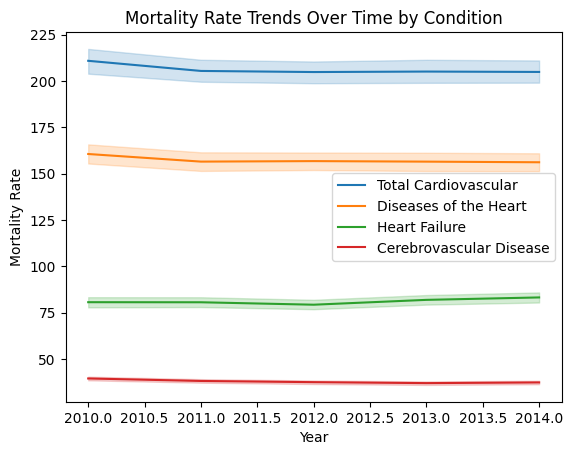

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting trends for each condition
sns.lineplot(data=df_cvd_mortality_cardio_disease, x='Year', y='DataValue', label='Total Cardiovascular')
sns.lineplot(data=df_cvd_mortality_diseases_heart, x='Year', y='DataValue', label='Diseases of the Heart')
sns.lineplot(data=df_cvd_mortality_heart_failure, x='Year', y='DataValue', label='Heart Failure')
sns.lineplot(data=df_cvd_mortality_cerebrovascular, x='Year', y='DataValue', label='Cerebrovascular Disease')
plt.title('Mortality Rate Trends Over Time by Condition')
plt.xlabel('Year')
plt.ylabel('Mortality Rate')
plt.legend()
plt.show()


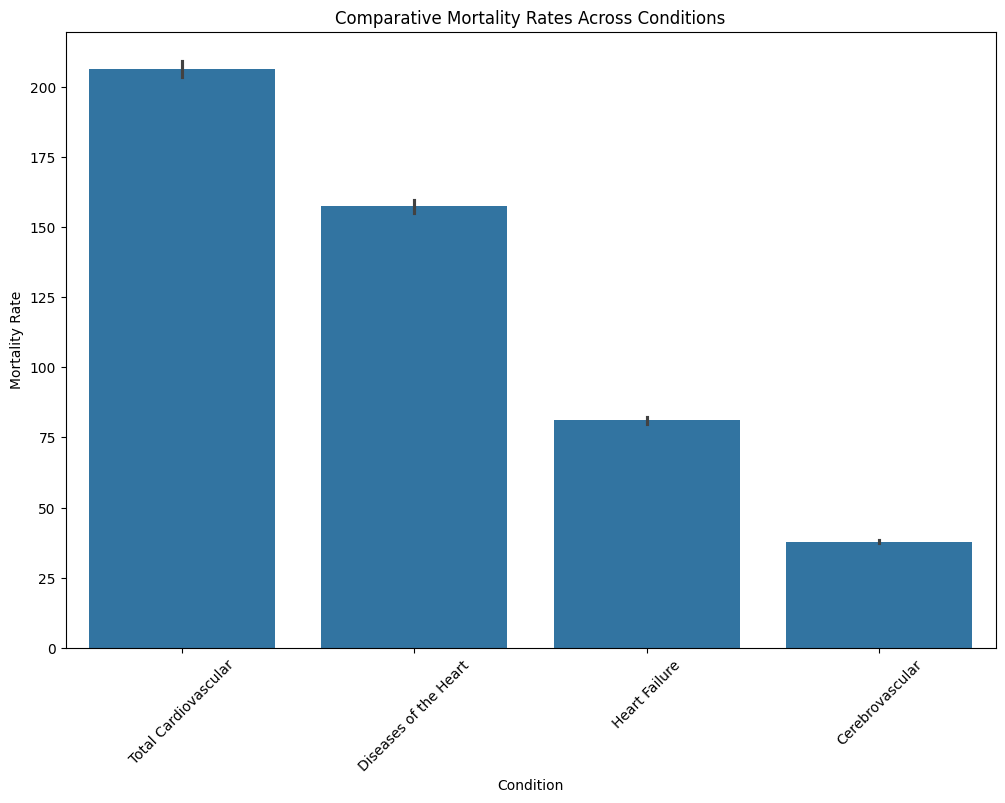

In [ ]:
# Combine data into a single DataFrame for visualization
data_frames = [df_cvd_mortality_cardio_disease.assign(Condition='Total Cardiovascular'),
               df_cvd_mortality_diseases_heart.assign(Condition='Diseases of the Heart'),
               df_cvd_mortality_heart_failure.assign(Condition='Heart Failure'),
               df_cvd_mortality_cerebrovascular.assign(Condition='Cerebrovascular')]

combined_df = pd.concat(data_frames)

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Condition', y='DataValue', data=combined_df)
plt.title('Comparative Mortality Rates Across Conditions')
plt.xlabel('Condition')
plt.ylabel('Mortality Rate')
plt.xticks(rotation=45)
plt.show()


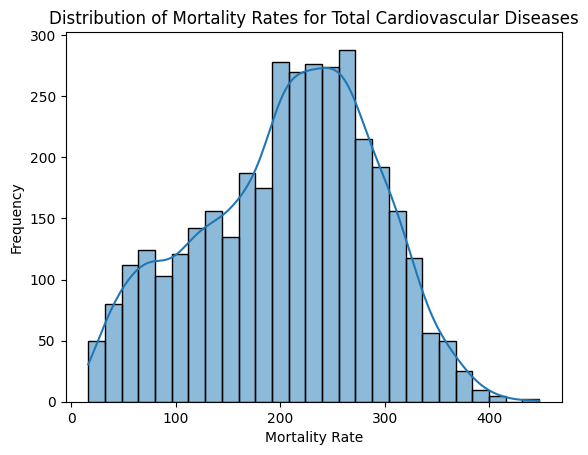

In [ ]:
# Histogram for a specific condition, e.g., total cardiovascular diseases
sns.histplot(df_cvd_mortality_cardio_disease['DataValue'], kde=True)
plt.title('Distribution of Mortality Rates for Total Cardiovascular Diseases')
plt.xlabel('Mortality Rate')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from scipy.stats import f_oneway

# Assuming all DataValue columns are numeric and not null
f_val, p_val = f_oneway(df_cvd_mortality_cardio_disease['DataValue'],
                        df_cvd_mortality_diseases_heart['DataValue'],
                        df_cvd_mortality_heart_failure['DataValue'],
                        df_cvd_mortality_cerebrovascular['DataValue'])

print("ANOVA test results: F =", f_val, ", P =", p_val)


ANOVA test results: F = 5611.411436559717 , P = 0.0


In [ ]:
# Show the evolution of deaths by total cardiovascular diseases trough the years
# the datavalues regarding the overall, male and female
df_cvd_1_overall=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_1_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_1_male=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_1_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_1_female=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_1_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_1_merged=pd.merge(df_cvd_1_overall,df_cvd_1_male,on='Year', how='inner')
df_cvd_1_merged=pd.merge(df_cvd_1_merged,df_cvd_1_female,on='Year', how='inner')
df_cvd_1_merged=df_cvd_1_merged[['DV_overall','DV_male','DV_female']]
df_cvd_1_merged

,DV_overall,DV_male,DV_female
Year,,,
2010,25472.5,27479.8,22961.6
2011,24968.4,27012.1,22400.5
2012,24836.7,26888.6,22265.5
2013,24875.7,27135.2,22104.5
2014,24857.8,27190.7,22008.3


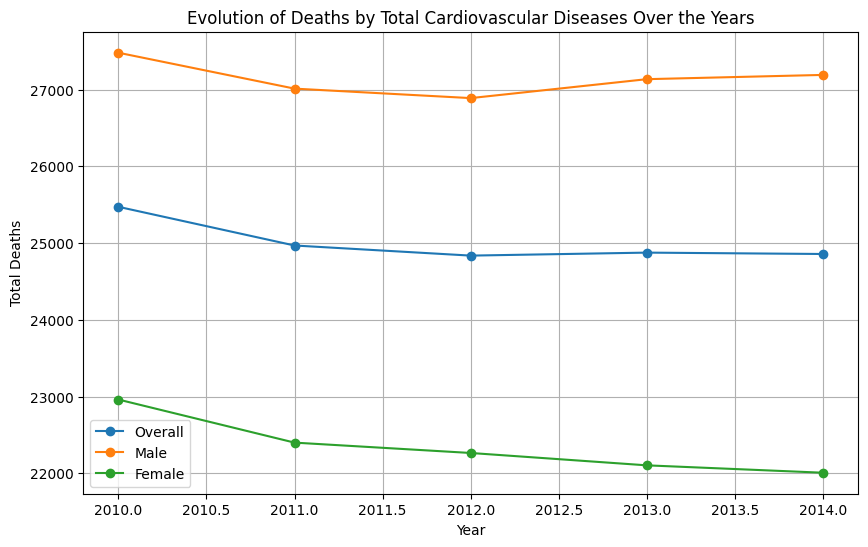

In [ ]:
# Data setup
data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Overall': [25472.5, 24968.4, 24836.7, 24875.7, 24857.8],
    'Male': [27479.8, 27012.1, 26888.6, 27135.2, 27190.7],
    'Female': [22961.6, 22400.5, 22265.5, 22104.5, 22008.3]
}
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Creating a line plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Overall'], label='Overall', marker='o')
plt.plot(df.index, df['Male'], label='Male', marker='o')
plt.plot(df.index, df['Female'], label='Female', marker='o')

plt.title('Evolution of Deaths by Total Cardiovascular Diseases Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Overall': [25472.5, 24968.4, 24836.7, 24875.7, 24857.8],
    'Male': [27479.8, 27012.1, 26888.6, 27135.2, 27190.7],
    'Female': [22961.6, 22400.5, 22265.5, 22104.5, 22008.3]
}
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)


In [ ]:
# Function to applying linear regression and print results
def run_ols(data, label):
    x = sm.add_constant(data.index)  # Adding a constant for the intercept
    model = sm.OLS(data.values, x)
    results = model.fit()
    print(f"Results for {label}:")
    print(results.summary())
    print("\n")

# Running regression on Overall, Male, and Female
run_ols(df['Overall'], 'Overall')
run_ols(df['Male'], 'Male')
run_ols(df['Female'], 'Female')


Results for Overall:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4.691
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.119
Time:                        13:35:30   Log-Likelihood:                -32.132
No. Observations:                   5   AIC:                             68.26
Df Residuals:                       3   BIC:                             67.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.91e+05   1.23e+0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


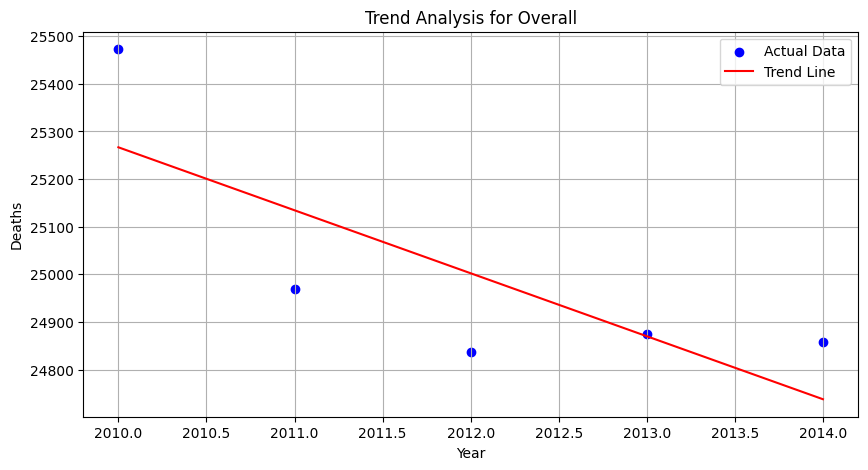

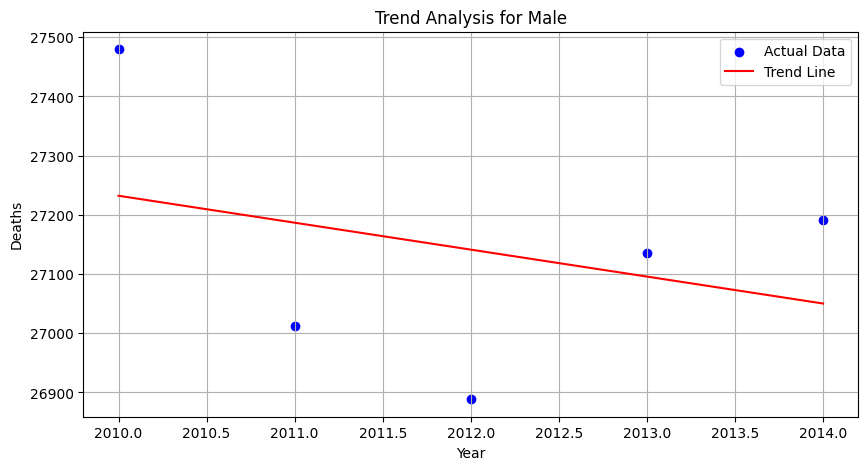

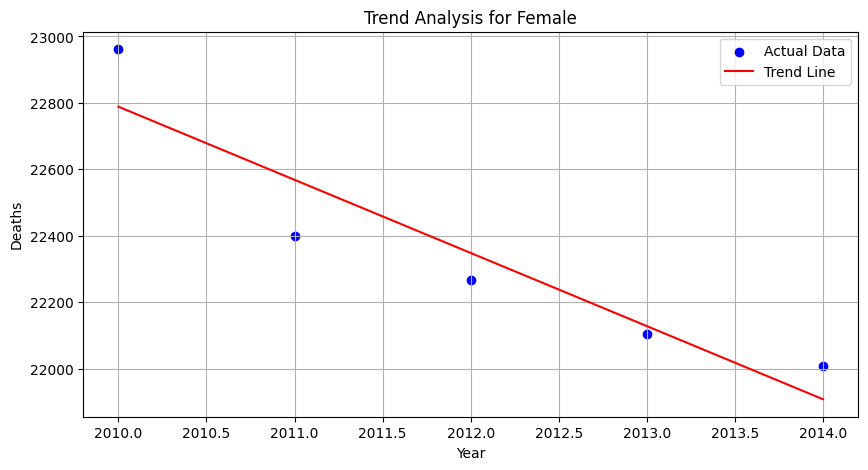

In [ ]:
import matplotlib.pyplot as plt

# Function to plot data and regression line
def plot_trend(data, label):
    plt.figure(figsize=(10, 5))
    plt.scatter(data.index, data.values, color='blue', label='Actual Data')
    x = sm.add_constant(data.index)
    y_pred = sm.OLS(data.values, x).fit().predict(x)
    plt.plot(data.index, y_pred, color='red', label='Trend Line')
    plt.title(f'Trend Analysis for {label}')
    plt.xlabel('Year')
    plt.ylabel('Deaths')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualizing the trends
plot_trend(df['Overall'], 'Overall')
plot_trend(df['Male'], 'Male')
plot_trend(df['Female'], 'Female')


In [ ]:
from scipy.stats import ttest_ind

# Example T-test between male and female mortality rates in 2010 and 2014
t_stat, p_val = ttest_ind([27479.8, 27190.7], [22961.6, 22008.3])

print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: 9.737871457429812, P-value: 0.01038167915789298


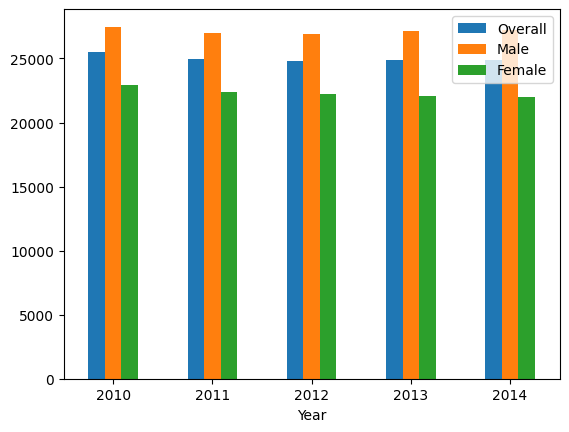

In [ ]:
df_plot = pd.DataFrame({'Overall': df_cvd_1_merged['DV_overall'],
                    'Male': df_cvd_1_merged['DV_male'],
                       'Female': df_cvd_1_merged['DV_female']}, index= df_cvd_1_merged.index)
ax = df_plot.plot.bar(rot=0)

In [ ]:
#It's dificult to apprecite a trend in the latter plot, so lets normalize the value df_cvd_1_merged to see the evolution of the figures
from sklearn import preprocessing
x=df_cvd_1_merged.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_1_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_1_merged.columns,index=df_cvd_1_merged.index)
#df_cvd_1_merged_norm=(df_cvd_1_merged-df_cvd_1_merged.mean())/df_cvd_1_merged.std()
df_cvd_1_merged_norm

,DV_overall,DV_male,DV_female
Year,,,
2010,1.964388,1.702806,1.832006
2011,-0.141268,-0.649795,0.156529
2012,-0.691387,-1.271018,-0.246589
2013,-0.528482,-0.030583,-0.727344
2014,-0.603251,0.248590,-1.014603


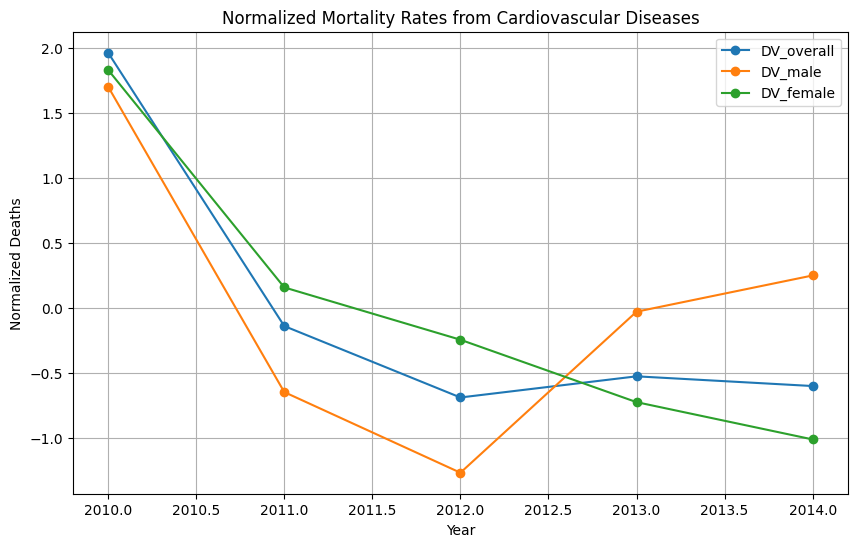

In [ ]:
import matplotlib.pyplot as plt

# Plotting normalized data
ax = df_cvd_1_merged_norm.plot(figsize=(10, 6), marker='o', title='Normalized Mortality Rates from Cardiovascular Diseases')
ax.set_xlabel("Year")
ax.set_ylabel("Normalized Deaths")
plt.grid(True)
plt.show()


In [ ]:
print("Shape of x before scaling:", x.shape)
print("Columns in df_cvd_1_merged:", df_cvd_1_merged.columns)

# Assuming x should include all columns of df_cvd_1_merged
x = df_cvd_1_merged.values  # This should include all columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

# Check the shape after scaling
print("Shape of x after scaling:", x_scaled.shape)


Shape of x before scaling: (5, 3)
Columns in df_cvd_1_merged: Index(['DV_overall', 'DV_male', 'DV_female'], dtype='object')
Shape of x after scaling: (5, 3)


In [ ]:
df_cvd_1_merged_min_max = pd.DataFrame(x_scaled, columns=df_cvd_1_merged.columns, index=df_cvd_1_merged.index)

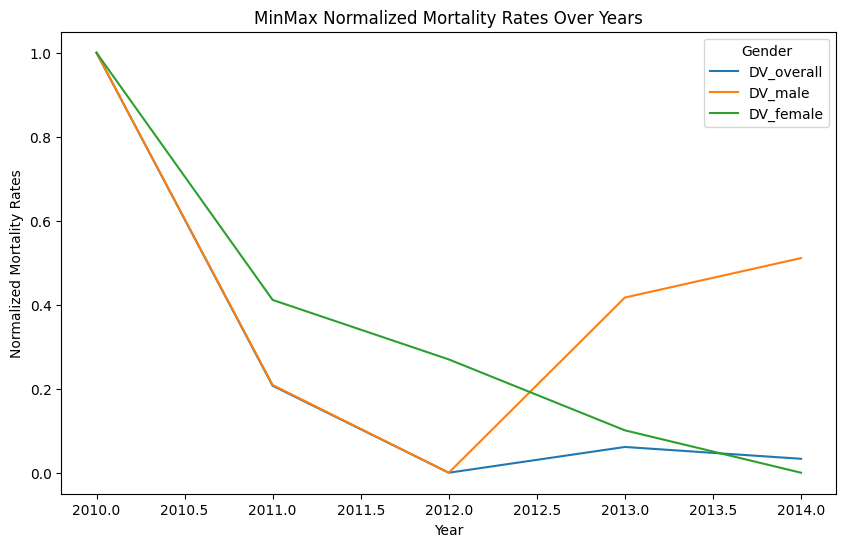

In [ ]:
import matplotlib.pyplot as plt

df_cvd_1_merged_min_max.plot(figsize=(10, 6))
plt.title('MinMax Normalized Mortality Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Normalized Mortality Rates')
plt.legend(title='Gender')
plt.show()


In [ ]:
#Show the evolution of deaths by total cardiovascular diseases trough the years
df_cvd_1_overall=df_cvd_mortality_cardio_disease[df_cvd_mortality_cardio_disease['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_2_overall=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_3_overall=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_4_overall=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Overall'].groupby('Year').sum()

df_cvd_overall = pd.DataFrame({'Mortality from total cardiovascular diseases': df_cvd_1_overall['DataValue'],
                    'Mortality from diseases of the heart': df_cvd_2_overall['DataValue'],
                       'Mortality from heart failure': df_cvd_3_overall['DataValue'],
                       'Mortality from cerebrovascular disease (stroke)':df_cvd_4_overall['DataValue']}, index= df_cvd_1_overall.index)


In [ ]:
#In the above plot the line regarding Mortality from heart failure has a anomalous slope up during 2012-2014
df_cvd_3_overall=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_3_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_3_male=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_3_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_3_female=df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_3_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_3_merged=pd.merge(df_cvd_3_overall,df_cvd_3_male,on='Year', how='inner')
df_cvd_3_merged=pd.merge(df_cvd_3_merged,df_cvd_3_female,on='Year', how='inner')
df_cvd_3_merged=df_cvd_3_merged[['DV_overall','DV_male','DV_female']]
df_cvd_3_merged

,DV_overall,DV_male,DV_female
Year,,,
2010,9530.8,9734.4,9202.0
2011,9542.9,9753.6,9191.4
2012,9458.8,9677.4,9098.4
2013,9711.3,9974.2,9288.7
2014,9941.6,10322.3,9416.2


In [ ]:
x=df_cvd_3_merged.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_3_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_3_merged.columns,index=df_cvd_3_merged.index)

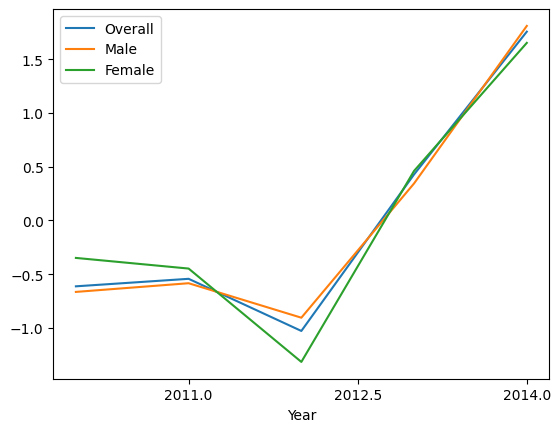

In [ ]:
df_cvd_3_merged_norm_plt = pd.DataFrame({'Overall': df_cvd_3_merged_norm['DV_overall'],
                    'Male': df_cvd_3_merged_norm['DV_male'],
                       'Female': df_cvd_3_merged_norm['DV_female']}, index= df_cvd_3_merged_norm.index)
ax3 = df_cvd_3_merged_norm_plt.plot.line(rot=0)
ax3.xaxis.set_major_locator(plt.MaxNLocator(4))
# We should check state by state to see if any state influences highly in the last two year (see section 3)

In [ ]:
#In the above plot the line regarding Mortality from heart failure has a anomalous slope up during 2012-2014
df_cvd_2_overall=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_2_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_2_male=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_2_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_2_female=df_cvd_mortality_diseases_heart[df_cvd_mortality_diseases_heart['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_2_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_2_merged=pd.merge(df_cvd_2_overall,df_cvd_2_male,on='Year', how='inner')
df_cvd_2_merged=pd.merge(df_cvd_2_merged,df_cvd_2_female,on='Year', how='inner')
df_cvd_2_merged=df_cvd_2_merged[['DV_overall','DV_male','DV_female']]
df_cvd_2_merged

,DV_overall,DV_male,DV_female
Year,,,
2010,19292.0,21795.3,16557.2
2011,18915.9,21449.9,16130.2
2012,18850.4,21410.6,16042.1
2013,18936.2,21585.2,16029.1
2014,18905.0,21616.6,15933.1


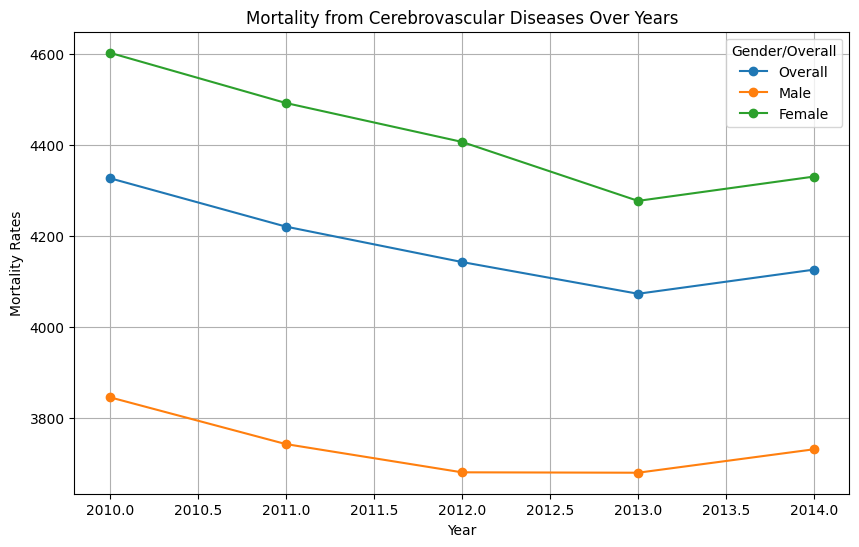

In [ ]:
# Preparing data
data = {
    'Year': [2010, 2011, 2012, 2013, 2014],
    'Overall': [4326.8, 4220.3, 4142.4, 4072.6, 4125.7],
    'Male': [3845.2, 3742.2, 3680.1, 3679.2, 3730.8],
    'Female': [4602.5, 4492.0, 4406.5, 4276.8, 4330.3]
}
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# Plotting the data
ax = df.plot(kind='line', marker='o', figsize=(10, 6))
ax.set_title('Mortality from Cerebrovascular Diseases Over Years')
ax.set_xlabel('Year')
ax.set_ylabel('Mortality Rates')
ax.grid(True)
ax.legend(title='Gender/Overall')
plt.show()


In [ ]:
import statsmodels.api as sm

# Function to run OLS regression and print results
def run_ols(series, label):
    y = series.values
    x = sm.add_constant(series.index)  # adding a constant for the intercept
    model = sm.OLS(y, x)
    results = model.fit()
    print(f"Results for {label}:")
    print(results.summary())

# Applying OLS regression to each category
run_ols(df['Overall'], 'Overall')
run_ols(df['Male'], 'Male')
run_ols(df['Female'], 'Female')


Results for Overall:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     10.31
Date:                Mon, 06 May 2024   Prob (F-statistic):             0.0489
Time:                        13:35:33   Log-Likelihood:                -25.778
No. Observations:                   5   AIC:                             55.56
Df Residuals:                       3   BIC:                             54.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.148e+05   3.45e+0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
x=df_cvd_2_merged.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_2_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_2_merged.columns,index=df_cvd_2_merged.index)

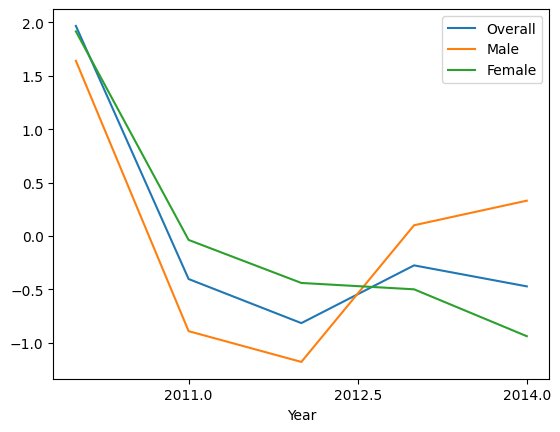

In [ ]:
df_cvd_2_merged_norm_plt = pd.DataFrame({'Overall': df_cvd_2_merged_norm['DV_overall'],
                    'Male': df_cvd_2_merged_norm['DV_male'],
                       'Female': df_cvd_2_merged_norm['DV_female']}, index= df_cvd_2_merged_norm.index)
ax2 = df_cvd_2_merged_norm_plt.plot.line(rot=0)
ax2.xaxis.set_major_locator(plt.MaxNLocator(4))

In [ ]:
df_cvd_4_overall=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Overall'].groupby('Year').sum()
df_cvd_4_overall.rename(columns={'DataValue':'DV_overall'},inplace=True)
df_cvd_4_male=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Male'].groupby('Year').sum()
df_cvd_4_male.rename(columns={'DataValue':'DV_male'},inplace=True)
df_cvd_4_female=df_cvd_mortality_cerebrovascular[df_cvd_mortality_cerebrovascular['Stratification1']=='Female'].groupby('Year').sum()
df_cvd_4_female.rename(columns={'DataValue':'DV_female'},inplace=True)

df_cvd_4_merged=pd.merge(df_cvd_4_overall,df_cvd_4_male,on='Year', how='inner')
df_cvd_4_merged=pd.merge(df_cvd_4_merged,df_cvd_4_female,on='Year', how='inner')
df_cvd_4_merged=df_cvd_4_merged[['DV_overall','DV_male','DV_female']]
df_cvd_4_merged

,DV_overall,DV_male,DV_female
Year,,,
2010,4326.8,3845.2,4602.5
2011,4220.3,3742.2,4492.0
2012,4142.4,3680.1,4406.5
2013,4072.6,3679.2,4276.8
2014,4125.7,3730.8,4330.3


In [ ]:
x=df_cvd_4_merged.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_cvd_4_merged_norm = pd.DataFrame(x_scaled, columns=df_cvd_4_merged.columns,index=df_cvd_4_merged.index)

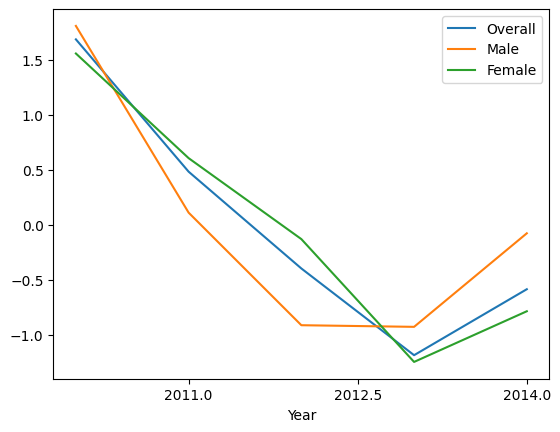

In [ ]:
df_cvd_4_merged_norm_plt = pd.DataFrame({'Overall': df_cvd_4_merged_norm['DV_overall'],
                    'Male': df_cvd_4_merged_norm['DV_male'],
                       'Female': df_cvd_4_merged_norm['DV_female']}, index= df_cvd_4_merged_norm.index)
ax4 = df_cvd_4_merged_norm_plt.plot.line(rot=0)
ax4.xaxis.set_major_locator(plt.MaxNLocator(4))

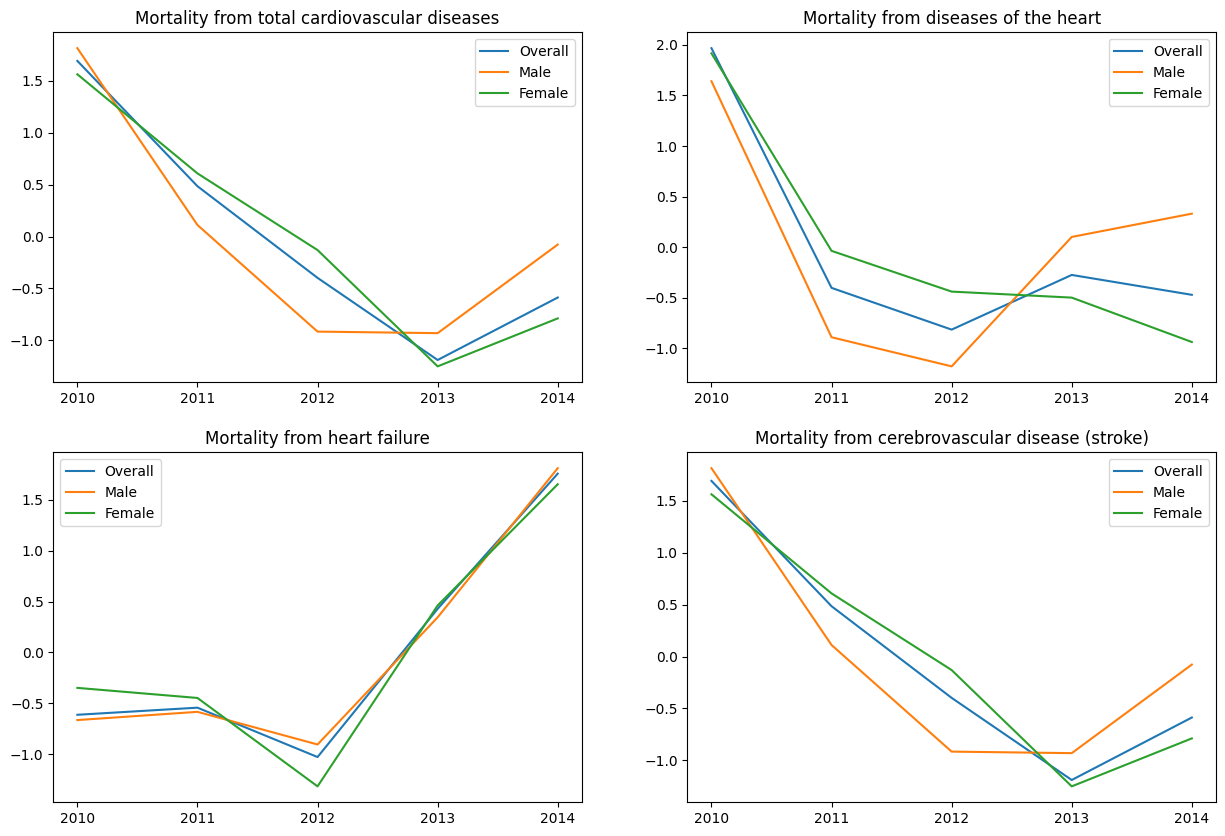

In [ ]:
#Let's group the four images in a subplot
fig,axs =plt.subplots(2,2, figsize=(15,10))
axs[0,0].plot(df_cvd_4_merged_norm_plt)
axs[0,0].set_title('Mortality from total cardiovascular diseases')
axs[0,1].plot(df_cvd_2_merged_norm_plt)
axs[0,1].set_title('Mortality from diseases of the heart')
axs[1,0].plot(df_cvd_3_merged_norm_plt)
axs[1,0].set_title('Mortality from heart failure')
axs[1,1].plot(df_cvd_4_merged_norm_plt)
axs[1,1].set_title('Mortality from cerebrovascular disease (stroke)')
for i in [0,1]:
    for j in [0,1]:
        axs[i,j].legend(['Overall','Male','Female'])
        axs[i,j].xaxis.set_major_locator(plt.MaxNLocator(5))

In [ ]:
#The most anomaluos trend is mortality from heart failure. So, lets explore per each state
df_cvd_mortality_heart_failure.head()

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
1434,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,143.5,143.5,113.4,179.1,Race/Ethnicity,American Indian or Alaska Native,2014
1435,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,76.9,76.9,65.8,88.0,Gender,Female,2014
1436,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,100.4,100.4,85.5,115.4,Gender,Male,2014
1437,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,87.5,87.5,78.5,96.4,Overall,Overall,2014
1438,AK,Alaska,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Age-adjusted Rate,84.7,84.7,74.5,94.9,Race/Ethnicity,"White, non-Hispanic",2014


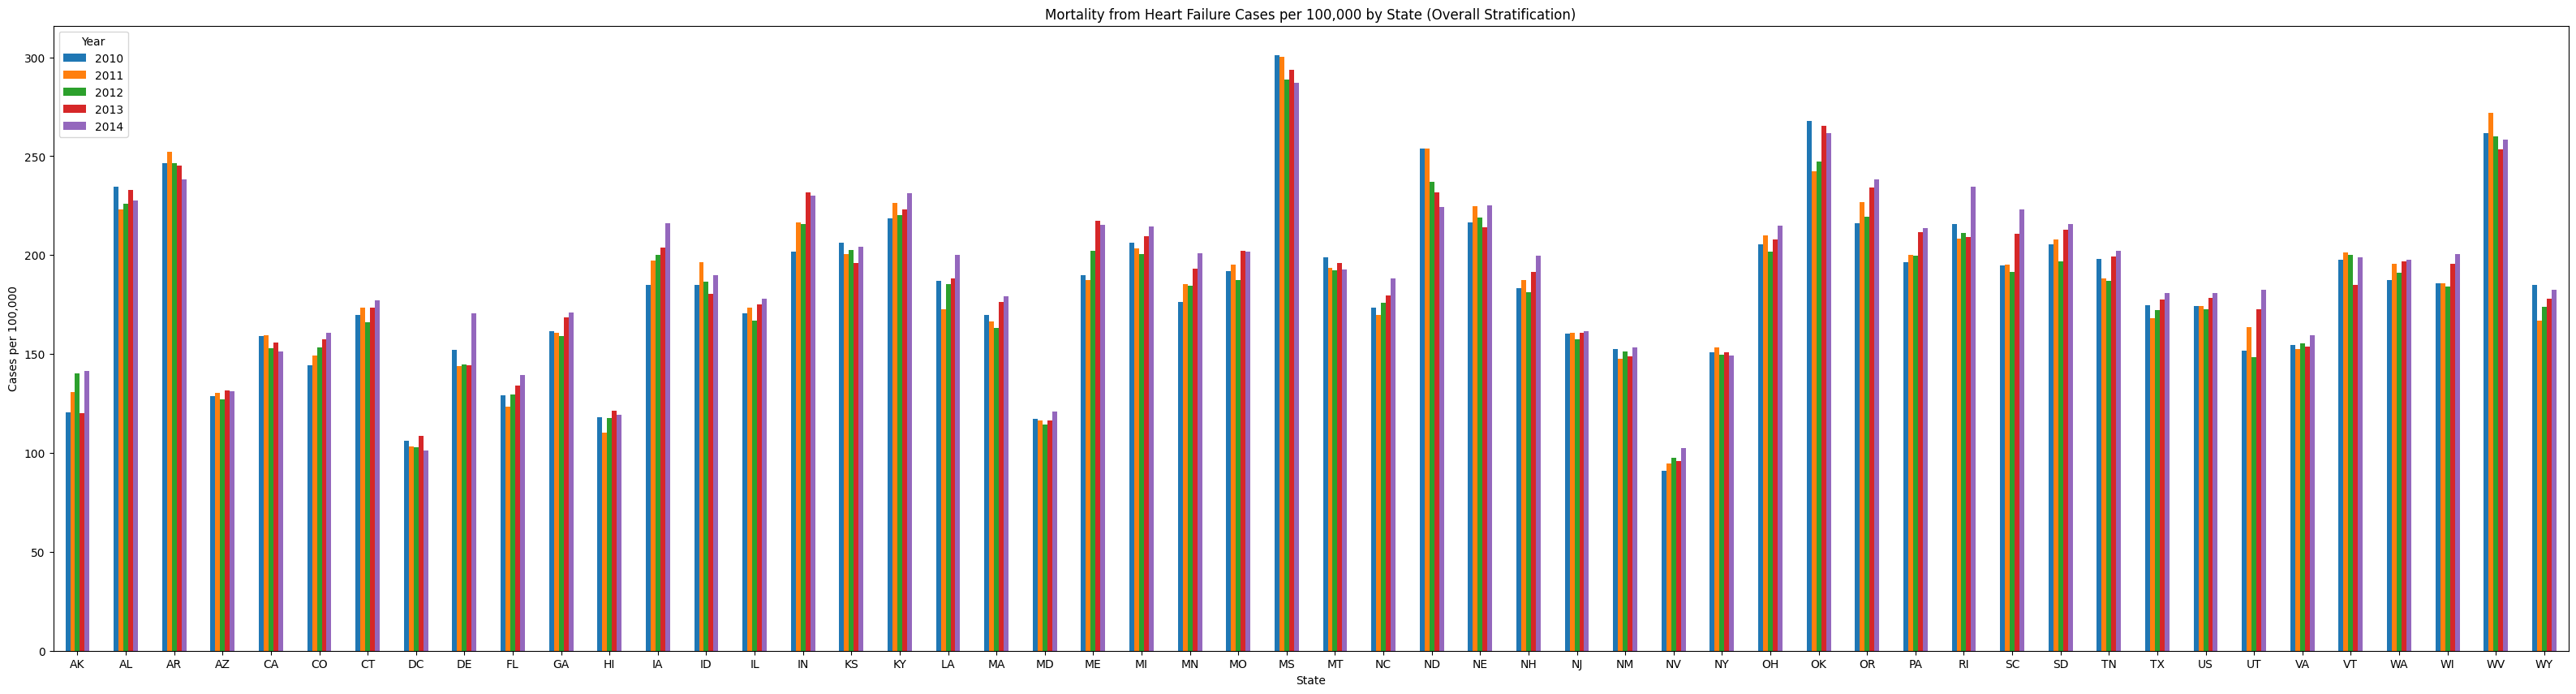

In [ ]:
# Filter the data for heart failure and overall stratification criteria
df_cvd_3ov_heart_failure = df_cvd_mortality_heart_failure[
    (df_cvd_mortality_heart_failure['Stratification1'] == 'Overall') &
    (df_cvd_mortality_heart_failure['Topic'] == 'Cardiovascular Disease') &
    (df_cvd_mortality_heart_failure['Question'] == 'Mortality from heart failure')]

# Group by state and sum the values for each year
df_cvd_3ov_heart_failure_grouped = df_cvd_3ov_heart_failure.groupby(['LocationAbbr', 'Year']).sum().reset_index()

# Pivot the table to have years as columns
df_cvd_3ov_heart_failure_pivoted = df_cvd_3ov_heart_failure_grouped.pivot(index='LocationAbbr', columns='Year', values='DataValue')

# Reset index to make LocationAbbr a column instead of index
df_cvd_3ov_heart_failure_pivoted.reset_index(inplace=True)

# Plot the bar chart
ax1 = df_cvd_3ov_heart_failure_pivoted.plot.bar(x='LocationAbbr', figsize=(40, 10), rot=0)
plt.xlabel('State')
plt.ylabel('Cases per 100,000')
plt.title('Mortality from Heart Failure Cases per 100,000 by State (Overall Stratification)')
plt.show()


In [ ]:
import plotly.express as px

# Convert the DataFrame from wide to long format for Plotly
df_long = df_cvd_3ov_heart_failure_pivoted.melt(id_vars=["LocationAbbr"], var_name="Year", value_name="Cases per 100,000")

# Create an interactive bar chart
fig = px.bar(df_long, x='LocationAbbr', y='Cases per 100,000', color='Year', barmode='group',
             labels={"LocationAbbr": "State"}, title='Mortality from Heart Failure Cases per 100,000 by State (Overall Stratification)')
fig.update_layout(xaxis_title="State", yaxis_title="Cases per 100,000", xaxis={'categoryorder':'total descending'})
fig.show()


In [ ]:
df_cvd_3ov_heart_failure_pivoted

Year,LocationAbbr,2010,2011,2012,2013,2014
0,AK,120.5,130.8,140.3,120.0,141.4
1,AL,234.5,223.2,226.0,233.0,227.8
2,AR,246.6,252.1,246.4,245.2,238.4
3,AZ,128.6,130.4,127.1,131.5,131.3
4,CA,159.0,159.7,153.0,155.7,151.4
5,CO,144.2,149.1,153.2,157.3,160.7
6,CT,169.8,173.4,165.9,173.5,177.2
7,DC,106.0,103.1,103.0,108.7,101.2
8,DE,152.3,144.0,144.6,144.5,170.4
9,FL,129.3,123.4,129.5,133.9,139.3


In [ ]:
df_cvd_mortality_cerebrovascular

,LocationAbbr,LocationDesc,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,Year
2088,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,50.9,50.9,34.8,71.9,Race/Ethnicity,American Indian or Alaska Native,2014
2089,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,24.4,24.4,18.7,31.3,Gender,Female,2014
2090,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,41.3,41.3,32.6,51.6,Gender,Male,2014
2091,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,32.3,32.3,27.0,37.6,Overall,Overall,2014
2092,AK,Alaska,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Age-adjusted Rate,30.0,30.0,23.9,36.0,Race/Ethnicity,"White, non-Hispanic",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13357,WV,West Virginia,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,61.3,61.3,57.6,65.0,Race/Ethnicity,"White, non-Hispanic",2010
13358,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,48.2,48.2,40.0,56.3,Gender,Female,2010
13359,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,24.7,24.7,19.3,31.2,Gender,Male,2010
13360,WY,Wyoming,Cardiovascular Disease,Mortality from cerebrovascular disease (stroke),"cases per 100,000",Crude Rate,36.2,36.2,31.2,41.2,Overall,Overall,2010


In [ ]:
# Filter data for 'Overall' stratification across all specified years
df_filtered = df_cvd_mortality_cerebrovascular[
    (df_cvd_mortality_cerebrovascular['Stratification1'] == 'Overall') &
    (df_cvd_mortality_cerebrovascular['Year'].isin(years))
]

# Drop duplicate entries in 'LocationAbbr'
df_filtered = df_filtered.drop_duplicates(subset=['LocationAbbr'])

# Group by state and year, then pivot to have years as columns
df_pivoted = df_filtered.pivot(index='LocationAbbr', columns='Year', values='DataValueAlt')

# Now you have a single DataFrame with states as rows and years as columns
print(df_pivoted)


Year          2014
LocationAbbr      
AK            32.3
AL            48.3
AR            45.4
AZ            28.3
CA            33.9
CO            33.4
CT            26.3
DC            33.6
DE            38.8
FL            33.0
GA            42.6
HI            34.1
IA            34.0
ID            36.8
IL            37.4
IN            41.7
KS            39.0
KY            41.8
LA            45.6
MA            28.7
MD            38.0
ME            33.2
MI            37.9
MN            34.0
MO            41.0
MS            48.8
MT            36.4
NC            43.0
ND            35.5
NE            34.7
NH            28.9
NJ            31.4
NM            34.7
NV            33.8
NY            26.1
OH            40.0
OK            43.0
OR            37.4
PA            36.7
RI            25.6
SC            44.2
SD            38.8
TN            45.8
TX            41.6
US            36.5
UT            37.9
VA            37.0
VT            31.7
WA            34.3
WI            34.6
WV          

In [ ]:
df_pivoted

Year,2014
LocationAbbr,
AK,32.3
AL,48.3
AR,45.4
AZ,28.3
CA,33.9
CO,33.4
CT,26.3
DC,33.6
DE,38.8


In [ ]:
import pandas as pd

# Assuming df_cvd_mortality_heart_failure is preloaded and filtered as described
df_cvd_3ov = df_cvd_mortality_heart_failure[df_cvd_mortality_heart_failure['Stratification1'] == 'Overall']

# Group and sum values for each state and year
df_cvd_3ov_grouped = df_cvd_3ov.groupby(['LocationAbbr', 'Year']).sum().reset_index()

# Pivot the table with error handling for missing values
df_cvd_3ov_pivoted = df_cvd_3ov_grouped.pivot(index='LocationAbbr', columns='Year', values='DataValue').fillna(0)

# Reset index to convert 'LocationAbbr' from index to column
df_cvd_3ov_pivoted.reset_index(inplace=True)

# Rename columns for better clarity and ensure correct data types
df_cvd_3ov_pivoted.columns.name = None
df_cvd_3ov_pivoted.columns = ['LocationAbbr', '2010', '2011', '2012', '2013', '2014']
df_cvd_3ov_pivoted[['2010', '2011', '2012', '2013', '2014']] = df_cvd_3ov_pivoted[['2010', '2011', '2012', '2013', '2014']].astype(float)

# Print the resulting DataFrame to verify correct structure and data
print(df_cvd_3ov_pivoted.head())


  LocationAbbr   2010   2011   2012   2013   2014
0           AK  120.5  130.8  140.3  120.0  141.4
1           AL  234.5  223.2  226.0  233.0  227.8
2           AR  246.6  252.1  246.4  245.2  238.4
3           AZ  128.6  130.4  127.1  131.5  131.3
4           CA  159.0  159.7  153.0  155.7  151.4


In [ ]:
print(df_cvd_3ov_pivoted.columns)

Index(['LocationAbbr', '2010', '2011', '2012', '2013', '2014'], dtype='object')


In [ ]:
df_cvd_3ov_pivoted

,LocationAbbr,2010,2011,2012,2013,2014
0,AK,120.5,130.8,140.3,120.0,141.4
1,AL,234.5,223.2,226.0,233.0,227.8
2,AR,246.6,252.1,246.4,245.2,238.4
3,AZ,128.6,130.4,127.1,131.5,131.3
4,CA,159.0,159.7,153.0,155.7,151.4
5,CO,144.2,149.1,153.2,157.3,160.7
6,CT,169.8,173.4,165.9,173.5,177.2
7,DC,106.0,103.1,103.0,108.7,101.2
8,DE,152.3,144.0,144.6,144.5,170.4
9,FL,129.3,123.4,129.5,133.9,139.3


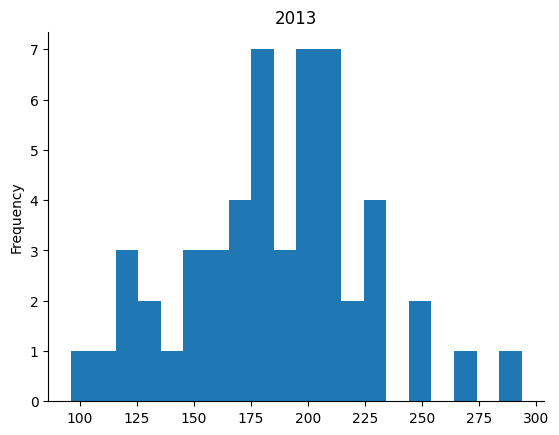

In [ ]:
from matplotlib import pyplot as plt
df_cvd_3ov_pivoted['2013'].plot(kind='hist', bins=20, title='2013')
plt.gca().spines[['top', 'right',]].set_visible(False)

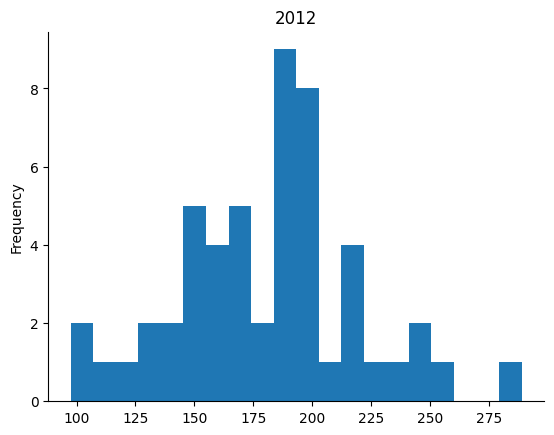

In [ ]:
from matplotlib import pyplot as plt
df_cvd_3ov_pivoted['2012'].plot(kind='hist', bins=20, title='2012')
plt.gca().spines[['top', 'right',]].set_visible(False)

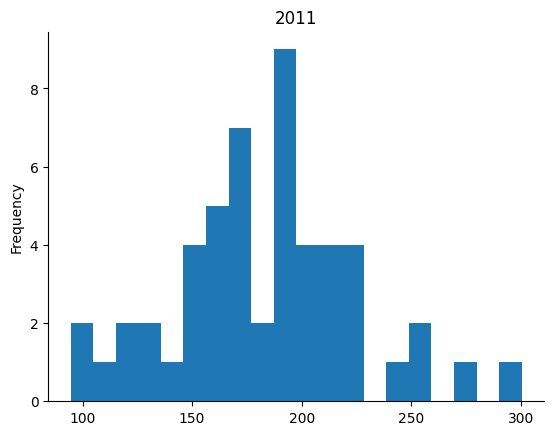

In [ ]:
from matplotlib import pyplot as plt
df_cvd_3ov_pivoted['2011'].plot(kind='hist', bins=20, title='2011')
plt.gca().spines[['top', 'right',]].set_visible(False)

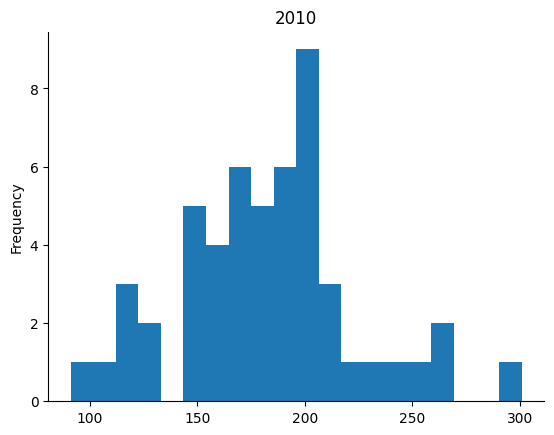

In [ ]:
from matplotlib import pyplot as plt
df_cvd_3ov_pivoted['2010'].plot(kind='hist', bins=20, title='2010')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Sample DataFrame columns setting assuming data from previous user input
columns = ['LocationAbbr', '2010', '2011', '2012', '2013', '2014']
data = [
    ['AK', 120.5, 130.8, 140.3, 120.0, 141.4],
    # Add other states
]
df_cvd_3ov_pivoted = pd.DataFrame(data, columns=columns)

# Convert years to a numeric format (if not already)
years = [int(year) for year in columns[1:]]  # This assumes years are the column headers starting from the second column

# Store regression results
regression_results = {}

for index, row in df_cvd_3ov_pivoted.iterrows():
    state = row['LocationAbbr']
    y = row[1:].astype(float)  # Mortality rates, convert to float if necessary
    X = sm.add_constant(years)  # Add a constant term for the intercept
    model = sm.OLS(y, X)
    results = model.fit()
    regression_results[state] = results

# Example: print results for a specific state
print(regression_results['AK'].summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.8762
Date:                Mon, 06 May 2024   Prob (F-statistic):              0.418
Time:                        13:41:47   Log-Likelihood:                -17.562
No. Observations:                   5   AIC:                             39.12
Df Residuals:                       3   BIC:                             38.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6106.6000   6663.337     -0.916      0.4

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



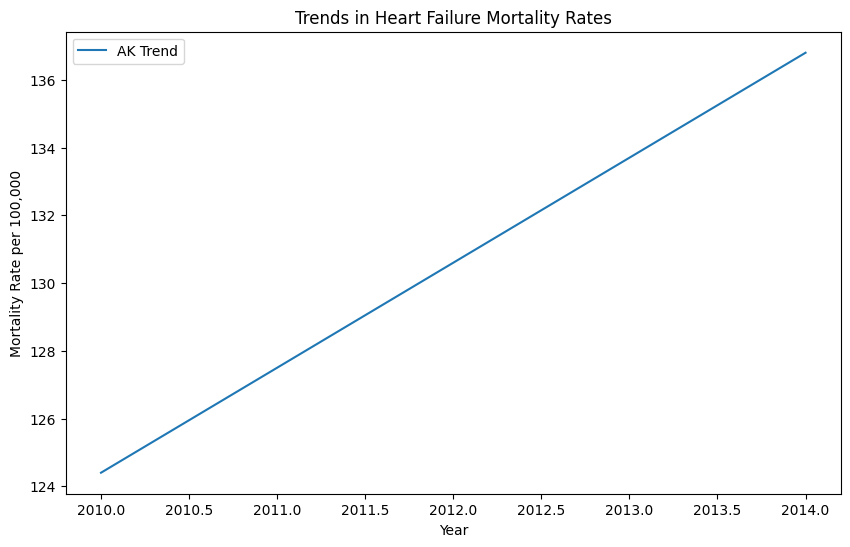

In [ ]:
# Plotting trends with regression lines
plt.figure(figsize=(10, 6))
for state in ['AK']:  # Replace or extend with other states as needed
    results = regression_results[state]
    plt.plot(years, results.predict(), label=f'{state} Trend')

plt.title('Trends in Heart Failure Mortality Rates')
plt.xlabel('Year')
plt.ylabel('Mortality Rate per 100,000')
plt.legend()
plt.show()


In [ ]:
# Sample data setup (make sure your data follows a similar structure)
data = {'Year': [2010, 2011, 2012, 2013, 2014],
        'MortalityRate': [120.5, 130.8, 140.3, 120.0, 141.4]}  # Example data
df = pd.DataFrame(data)
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)


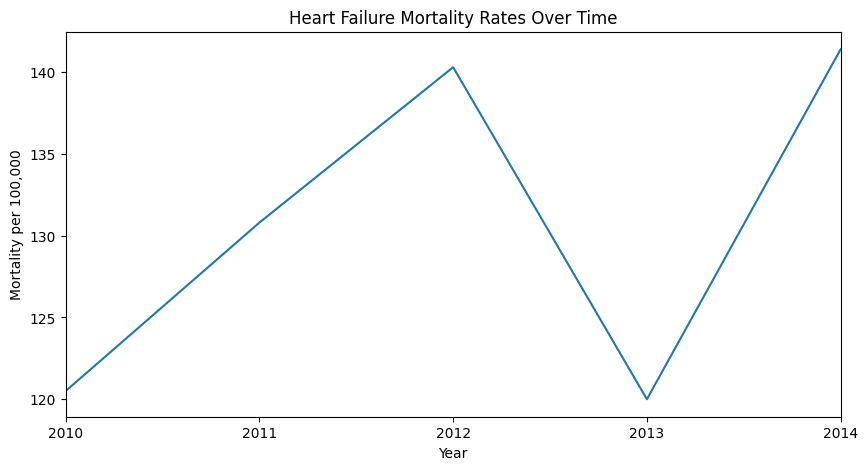

In [ ]:
df['MortalityRate'].plot(title='Heart Failure Mortality Rates Over Time', figsize=(10, 5))
plt.ylabel('Mortality per 100,000')
plt.show()